In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import load_model
from scoringrules import crps_normal
from matplotlib.offsetbox import AnchoredText
from tensorflow.keras.utils import plot_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Make painel for the output targets:

In [2]:
# load the cases dataset 
data = pd.read_csv('./data/dengue.csv.gz')

In [3]:
def get_preds(state, year, model_name, clima = False):

    if clima: 
        df_preds = pd.read_csv(f'./predictions/preds_climate_{state}_{year}_{model_name}.csv')

    else: 
        df_preds = pd.read_csv(f'./predictions/preds_{state}_{year}_{model_name}.csv')
        
    df_preds.dates = pd.to_datetime(df_preds.dates)

    # REPLACE O BY 1 TO ALLOW THE CALCULUS OF THE INDEX
    df_preds['preds'] = df_preds['preds'].replace({0:1})

    df_preds['upper'] = df_preds['upper'].replace({0:1})

    return df_preds


def get_score(df_true, df_preds):
    
    score = crps_normal(df_true.casos, df_preds.preds, (df_preds.upper-df_preds.lower)/4)
    
    return np.mean(score)
    
def plot_preds(ax, i, state, model_name, clima): 

    data_w = data.loc[data.uf == state]

    data_w.loc[:, 'date'] = pd.to_datetime(data_w.date)
    
    data_w.set_index('date',inplace = True)
    
    data_w = data_w[['casos']].resample('W-SUN').sum()

    df_preds_23_1 = get_preds(state, 2023, model_name, clima)

    df_preds_24_1 = get_preds(state, 2024, model_name, clima)

    data_w_23 = data_w.loc[data_w.index.isin(df_preds_23_1.dates)]

    ax[i].plot(data_w_23.casos, label = 'Data', color = 'black')

    ax[i].plot(df_preds_23_1.dates, df_preds_23_1.preds, label = f'preds - {model_name}', color = 'tab:orange')

    ax[i].fill_between( df_preds_23_1.dates, df_preds_23_1.lower, df_preds_23_1.upper, color = 'tab:orange', alpha = 0.2)

    m_score = f'''CRPS \n{model_name}: {round(get_score(data_w_23, df_preds_23_1), 2)}'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    at.patch.set_alpha(0.25) 

    ax[i].add_artist(at)

    ax[i].set_title(f'{state} - 2023')

    data_w_24 = data_w.loc[data_w.index.isin(df_preds_24_1.dates)]

    ax[i+1].plot(data_w_24.casos, label = 'Data', color = 'black')

    ax[i+1].plot(df_preds_24_1.dates, df_preds_24_1.preds, label = f'{model_name}', color = 'tab:orange')

    ax[i+1].fill_between( df_preds_24_1.dates, df_preds_24_1.lower, df_preds_24_1.upper, color = 'tab:orange', alpha = 0.2)
    
    ax[i+1].set_title(f'{state} - 2024')

    ax[i+1].legend(bbox_to_anchor=(1.25, 0.525, 0.1, 0.5))

    m_score = f'''CRPS \n{model_name}: {round(get_score(data_w_24, df_preds_24_1.iloc[:35]), 2)}'''

    at = AnchoredText(m_score,
                     prop=dict(size=8), frameon=True,
                      loc=2,
                      )

    at.patch.set_alpha(0.25) 
    
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")

    ax[i+1].add_artist(at)

## PR
Predictors used in the model: 
* `casos`;
* `epiweek`;
* `enso`;
* `pop_norm`; 

In [33]:
state = 'PR'
model_name = 'baseline'

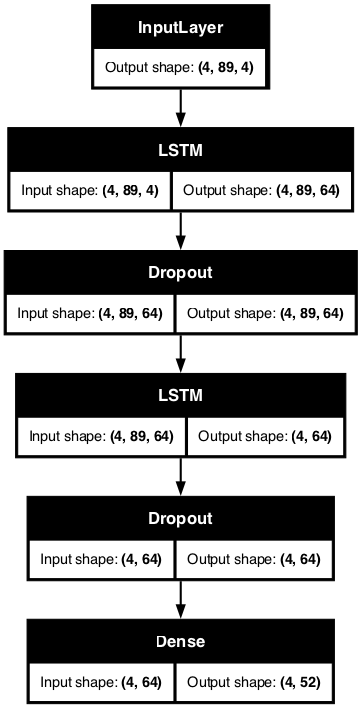

In [34]:
model = load_model(f'./saved_models/model_{state}_2023_{model_name}.keras') 
plot_model(model, show_shapes = True, dpi = 75)

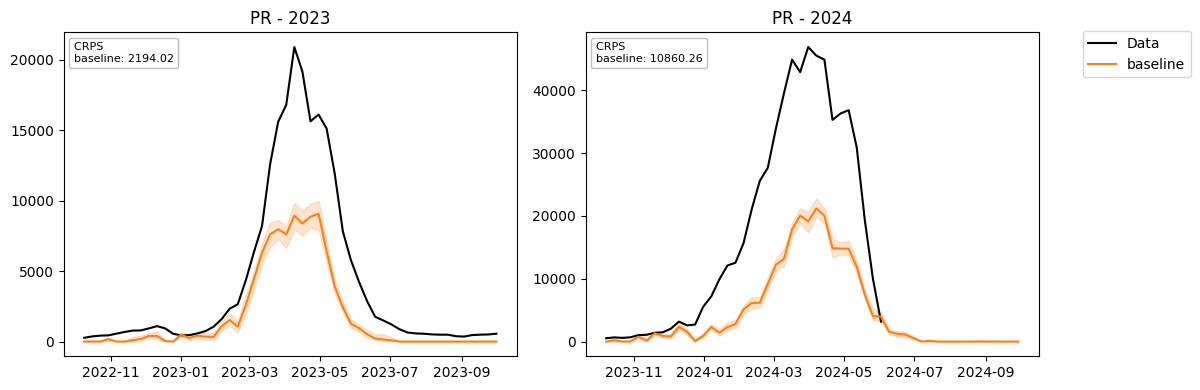

In [35]:
fig, ax  = plt.subplots(1,2, figsize = (12, 4))
plot_preds(ax, 0, state, model_name, False)
plt.tight_layout()

plt.show()

## MG

Predictors used in the model: 
* `casos`;
* `epiweek`;
* `enso`;
* `pop_norm`;
* `R0`;
* `total_cases`;
* `peak_week`;
* `perc_geocode`. 

In [36]:
state = 'MG'
model_name = 'baseline'


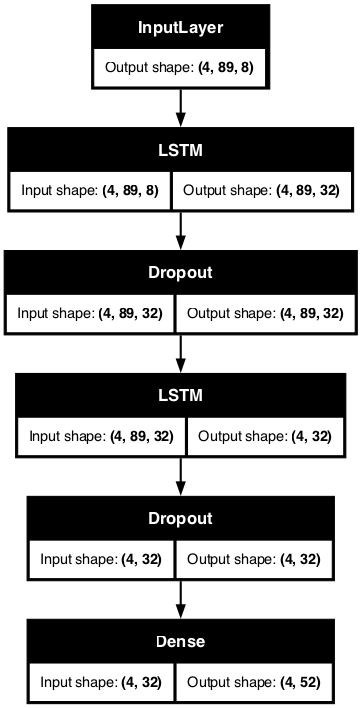

In [37]:
model = load_model(f'./saved_models/model_{state}_2023_{model_name}.keras') 
plot_model(model, show_shapes = True, dpi = 75)

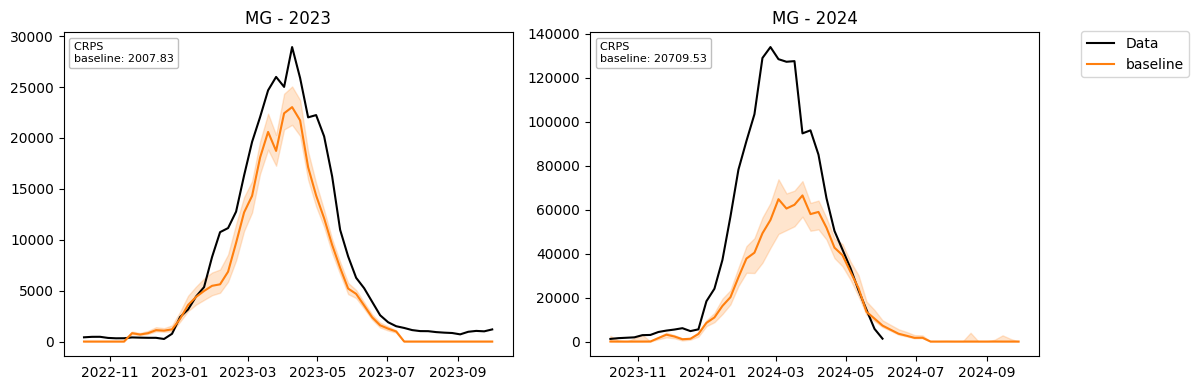

In [38]:
fig, ax  = plt.subplots(1,2, figsize = (12, 4))
plot_preds(ax, 0, state, model_name, False)
plt.tight_layout()

plt.show()

## GO

Predictors used in the model: 
* `casos`;
* `epiweek`;
* `enso`;
* `pop_norm`;
* `R0`;
* `total_cases`;
* `peak_week`;
* `perc_geocode`. 

In [11]:
state = 'GO'
model_name = 'att'

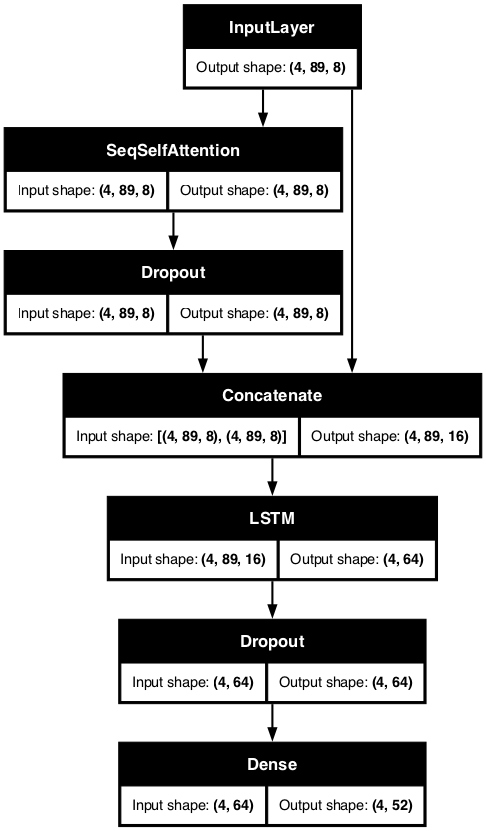

In [12]:
model = load_model(f'./saved_models/model_{state}_2023_{model_name}.keras') 
plot_model(model, show_shapes = True, dpi = 75)

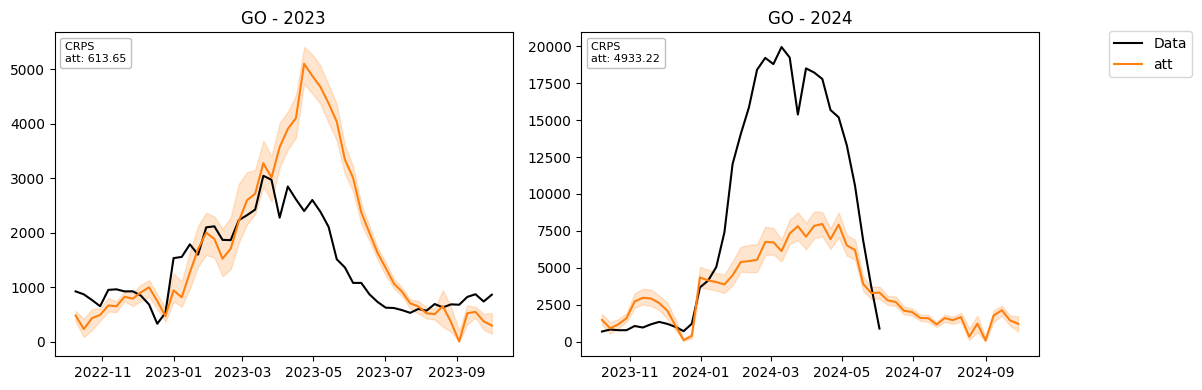

In [13]:
fig, ax  = plt.subplots(1,2, figsize = (12, 4))
plot_preds(ax, 0, state, model_name, False)
plt.tight_layout()

plt.show()

## CE

Predictors used in the model: 
* `casos`;
* `epiweek`;
* `enso`;
* `pop_norm`;
* `R0`;
* `total_cases`;
* `peak_week`;
* `perc_geocode`. 

In [14]:
state = 'CE'
model_name = 'baseline'

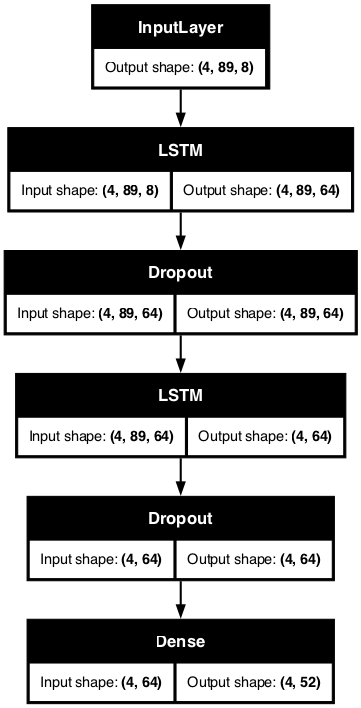

In [15]:
model = load_model(f'./saved_models/model_{state}_2023_{model_name}.keras') 
plot_model(model, show_shapes = True, dpi = 75)

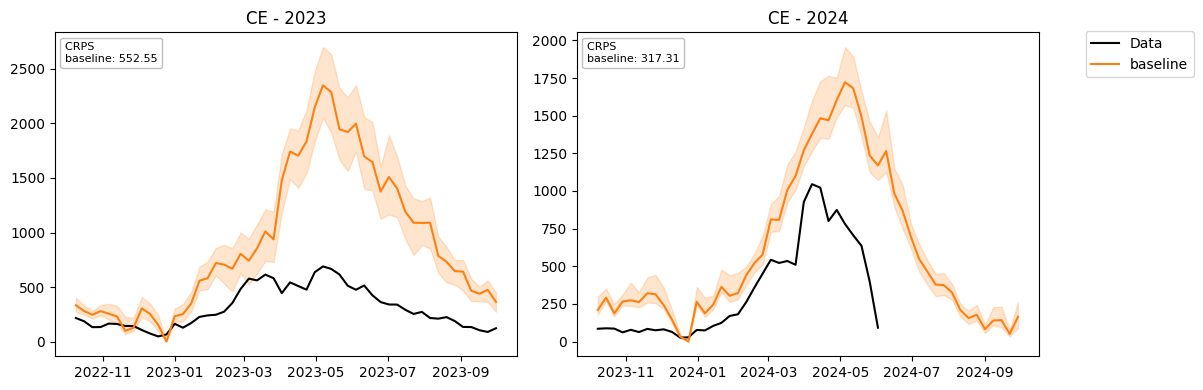

In [16]:
fig, ax  = plt.subplots(1,2, figsize = (12, 4))
plot_preds(ax, 0, state, model_name, False)
plt.tight_layout()

plt.show()

## AM

Predictors used in the model: 
* `casos`;
* `epiweek`;
* `enso`;
* `pop_norm`;
* `R0`;
* `total_cases`;
* `peak_week`;
* `perc_geocode`. 

In [17]:
state = 'AM'
model_name = 'comb_att'

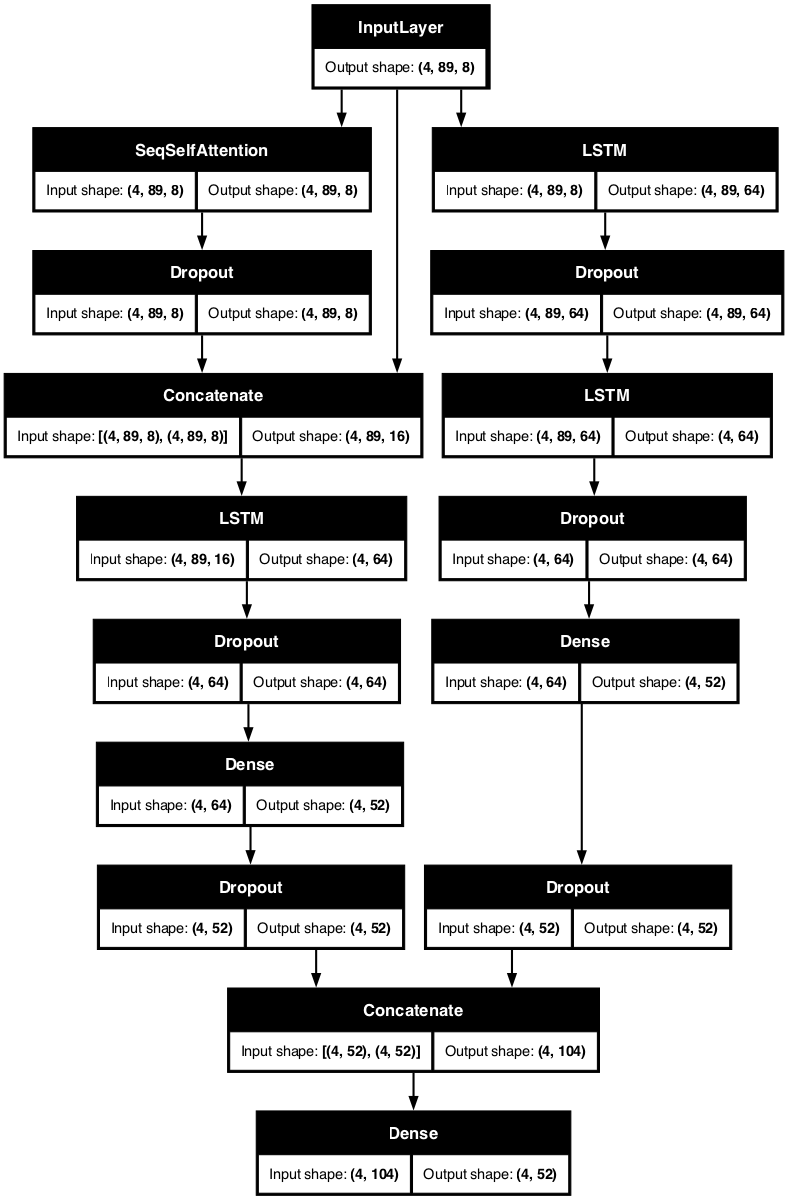

In [18]:
model = load_model(f'./saved_models/model_{state}_2023_{model_name}.keras') 
plot_model(model, show_shapes = True, dpi = 75)

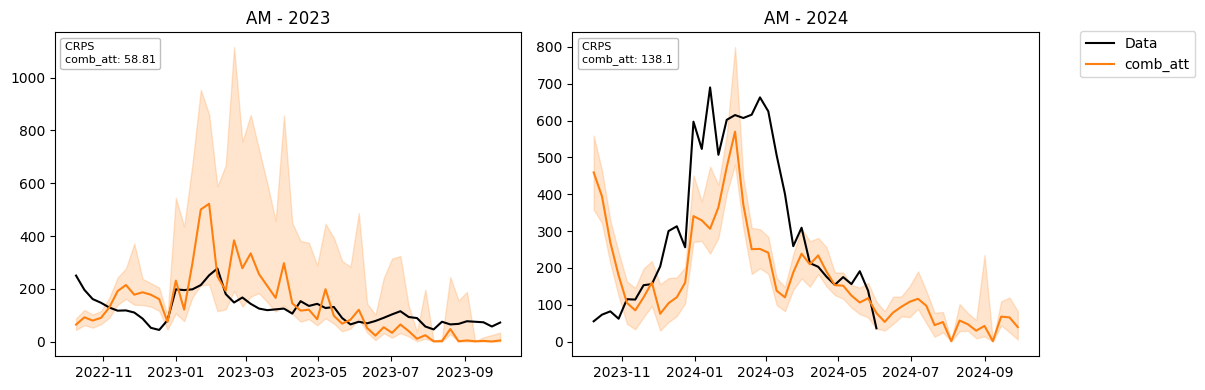

In [20]:
fig, ax  = plt.subplots(1,2, figsize = (12, 4))
plot_preds(ax, 0, state, model_name, False)
plt.tight_layout()

plt.show()

## Panel with best model by regions: 

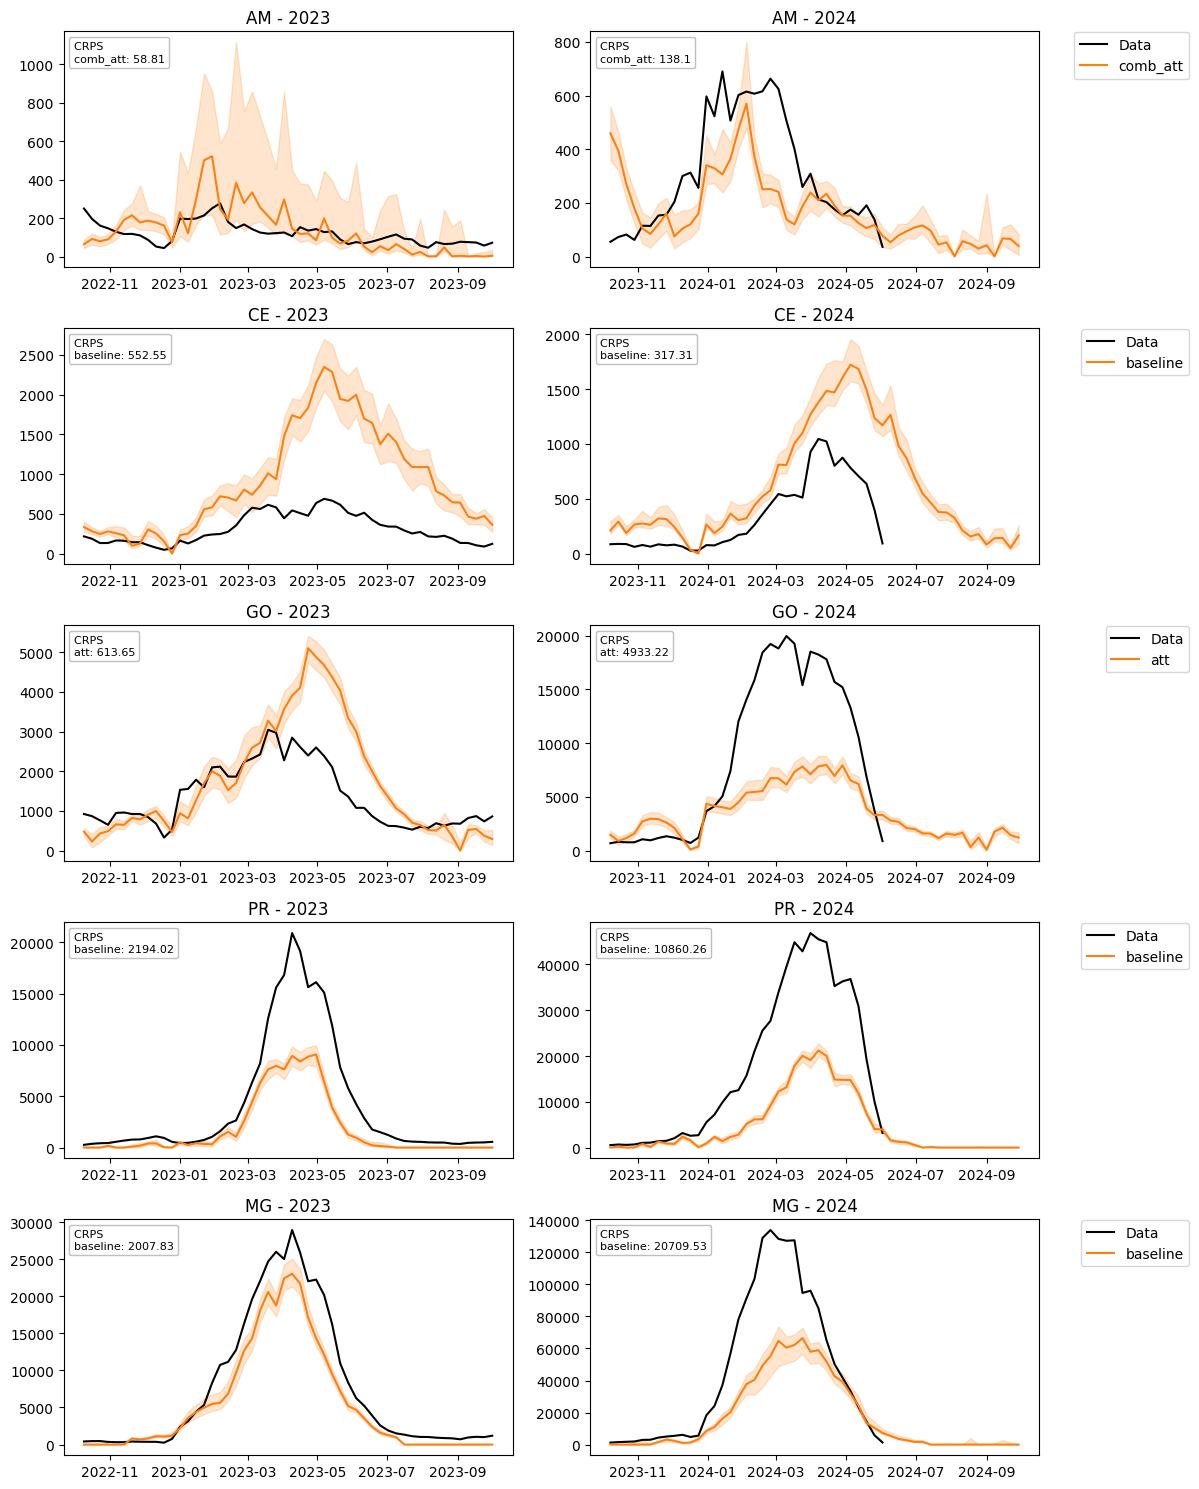

In [44]:
fig, axs  = plt.subplots(5,2, figsize = (12, 15))

ax =axs.ravel()
plot_preds(ax, 0, 'AM', 'comb_att', False)
plot_preds(ax, 2, 'CE', 'baseline', False)
plot_preds(ax, 4, 'GO', 'att', False)
plot_preds(ax, 6, 'PR', 'baseline', False)
plot_preds(ax, 8, 'MG', 'baseline', False)

plt.tight_layout()

plt.savefig('./figures/best_models.png', dpi = 600, bbox_inches = 'tight')

plt.show()